Columns: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')
Default n_estimators=10, Accuracy: 0.8277

Confusion Matrix (n=10):
[[10722   387]
 [ 2138  1406]]


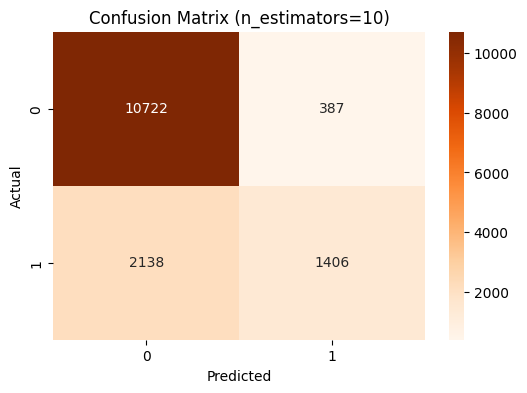


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     11109
           1       0.78      0.40      0.53      3544

    accuracy                           0.83     14653
   macro avg       0.81      0.68      0.71     14653
weighted avg       0.82      0.83      0.81     14653

n_estimators=1, Accuracy: 0.8007
n_estimators=6, Accuracy: 0.8214
n_estimators=11, Accuracy: 0.8240
n_estimators=16, Accuracy: 0.8244
n_estimators=21, Accuracy: 0.8248
n_estimators=26, Accuracy: 0.8285
n_estimators=31, Accuracy: 0.8295
n_estimators=36, Accuracy: 0.8300
n_estimators=41, Accuracy: 0.8301
n_estimators=46, Accuracy: 0.8302
n_estimators=51, Accuracy: 0.8292
n_estimators=56, Accuracy: 0.8292
n_estimators=61, Accuracy: 0.8297
n_estimators=66, Accuracy: 0.8302
n_estimators=71, Accuracy: 0.8303
n_estimators=76, Accuracy: 0.8305
n_estimators=81, Accuracy: 0.8307
n_estimators=86, Accuracy: 0.8305
n_estimators=91, Accuracy: 0.8305
n_est

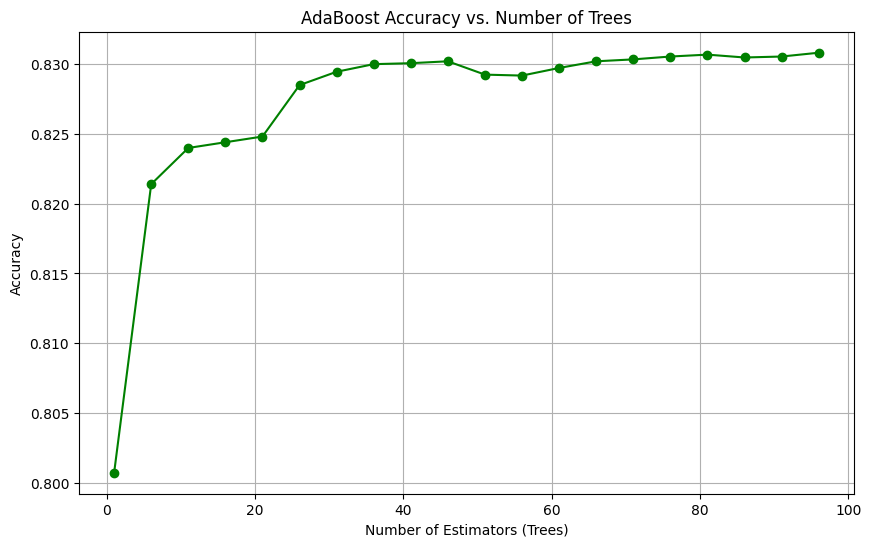

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/income.csv'  # Update path if needed
data = pd.read_csv(file_path)

# Inspect columns
print("Columns:", data.columns)

# Assume last column is target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Build AdaBoost with default n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
score_default = accuracy_score(y_test, y_pred_default)
print(f"Default n_estimators=10, Accuracy: {score_default:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (n=10):")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (n_estimators=10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default))

# 2️⃣ Fine-tune n_estimators
best_score = 0
best_n = 0
scores = []
n_values = range(1, 101, 5)

for n in n_values:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"n_estimators={n}, Accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest Accuracy = {best_score:.4f} with n_estimators = {best_n}")

# Plot: Accuracy vs Number of Estimators
plt.figure(figsize=(10,6))
plt.plot(n_values, scores, marker='o', color='green')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()

